In [1]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd
import numpy as np

In [2]:
identifier_name = 'flight_id'

features_names = [
 'month_day',
 'month',
 'day',
 'actual_offblock_time_hour_minute',
 'actual_offblock_time_hour',
 'actual_offblock_time_minute',
 'adep',
 'country_code_adep',
 'arrival_time_hour_minute',
 'arrival_time_hour',
 'arrival_time_minute',
 'ades',
 'country_code_ades',
 'aircraft_type',
 'wtc',
 'airline',
 'flight_duration',
 'taxiout_time',
 'flown_distance',
 'latitude_count',
 'latitude_mean',
 'latitude_std',
 'latitude_min',
 'latitude_25percentile',
 'latitude_median',
 'latitude_75percentile',
 'latitude_max',
 'longitude_count',
 'longitude_mean',
 'longitude_std',
 'longitude_min',
 'longitude_25percentile',
 'longitude_median',
 'longitude_75percentile',
 'longitude_max',
 'altitude_count',
 'altitude_mean',
 'altitude_std',
 'altitude_min',
 'altitude_25percentile',
 'altitude_median',
 'altitude_75percentile',
 'altitude_max',
 'groundspeed_count',
 'groundspeed_mean',
 'groundspeed_std',
 'groundspeed_min',
 'groundspeed_25percentile',
 'groundspeed_median',
 'groundspeed_75percentile',
 'groundspeed_max',
 'track_count',
 'track_mean',
 'track_std',
 'track_min',
 'track_25percentile',
 'track_median',
 'track_75percentile',
 'track_max',
 'vertical_rate_count',
 'vertical_rate_mean',
 'vertical_rate_std',
 'vertical_rate_min',
 'vertical_rate_25percentile',
 'vertical_rate_median',
 'vertical_rate_75percentile',
 'vertical_rate_max',
 'track_unwrapped_count',
 'track_unwrapped_mean',
 'track_unwrapped_std',
 'track_unwrapped_min',
 'track_unwrapped_25percentile',
 'track_unwrapped_median',
 'track_unwrapped_75percentile',
 'track_unwrapped_max',
 'u_component_of_wind_count',
 'u_component_of_wind_mean',
 'u_component_of_wind_std',
 'u_component_of_wind_min',
 'u_component_of_wind_25percentile',
 'u_component_of_wind_median',
 'u_component_of_wind_75percentile',
 'u_component_of_wind_max',
 'v_component_of_wind_count',
 'v_component_of_wind_mean',
 'v_component_of_wind_std',
 'v_component_of_wind_min',
 'v_component_of_wind_25percentile',
 'v_component_of_wind_median',
 'v_component_of_wind_75percentile',
 'v_component_of_wind_max',
 'temperature_count',
 'temperature_mean',
 'temperature_std',
 'temperature_min',
 'temperature_25percentile',
 'temperature_median',
 'temperature_75percentile',
 'temperature_max',
 'specific_humidity_count',
 'specific_humidity_mean',
 'specific_humidity_std',
 'specific_humidity_min',
 'specific_humidity_25percentile',
 'specific_humidity_median',
 'specific_humidity_75percentile',
 'specific_humidity_max'
]

target_name = 'tow'

global_random_state = 123

In [3]:
encoded_challenge_set = pd.read_csv('data/encoded_challenge_set.csv')
encoded_challenge_set = encoded_challenge_set.fillna(0)
data_df = encoded_challenge_set[features_names+[target_name]]

In [8]:
all_rmse = []
n_clusters = list(range(1, 51, 1))

for n in n_clusters:
    print(f"Trying n_clusters: {n}...")
    
    #scaler = StandardScaler()
    #df_scaled = scaler.fit_transform(data_df)
    
    kmeans = KMeans(n_clusters=3, random_state=global_random_state)
    data_df['cluster'] = kmeans.fit_predict(data_df[features_names])

    mean_mse_score = []
    for cluster_nr in range(0, n, 1):
        cluster_df = data_df[data_df['cluster'] == cluster_nr]
        
        X = cluster_df[features_names]
        y = cluster_df[target_name]
        if cluster_df.empty:
            print(f"---> No samples in this cluster number: {cluster_nr}")
            continue

        model = xgb.XGBRegressor(
            colsample_bytree=1.0,
            learning_rate=0.1, 
            max_depth=10, 
            n_estimators=91, 
            subsample=1.0,
            objective='reg:squarederror', 
            eval_metric='rmse',
            random_state=global_random_state
        )
        
        kf = KFold(n_splits=3, shuffle=True, random_state=global_random_state)
        scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
        mse_scores = -scores
        mean_mse = np.mean(mse_scores)
        mean_mse_score.append(mean_mse)
        print(f'---> cluster number: {cluster_nr}, MSE: {mean_mse:.4f}')

    n_clusters_rmse_score = np.sqrt(np.mean(mean_mse_score))
    all_rmse.append(n_clusters_rmse_score)
    print(f'***n_clusters={n}: {cluster_nr}, RMSE: {n_clusters_rmse_score:.4f}\n')

Trying n_clusters: 1...
---> cluster number: 0, MSE: 8412879.7320
***n_clusters=1: 0, RMSE: 2900.4965

Trying n_clusters: 2...
---> cluster number: 0, MSE: 8412879.7320
---> cluster number: 1, MSE: 16530948.0708
***n_clusters=2: 1, RMSE: 3531.5597

Trying n_clusters: 3...
---> cluster number: 0, MSE: 8412879.7320
---> cluster number: 1, MSE: 16530948.0708
---> cluster number: 2, MSE: 8194576.7683
***n_clusters=3: 2, RMSE: 3323.5726

Trying n_clusters: 4...
---> cluster number: 0, MSE: 8412879.7320
---> cluster number: 1, MSE: 16530948.0708
---> cluster number: 2, MSE: 8194576.7683
---> No samples in this cluster number: 3
***n_clusters=4: 3, RMSE: 3323.5726

Trying n_clusters: 5...
---> cluster number: 0, MSE: 8412879.7320
---> cluster number: 1, MSE: 16530948.0708
---> cluster number: 2, MSE: 8194576.7683
---> No samples in this cluster number: 3
---> No samples in this cluster number: 4
***n_clusters=5: 4, RMSE: 3323.5726

Trying n_clusters: 6...
---> cluster number: 0, MSE: 8412879.

KeyboardInterrupt: 

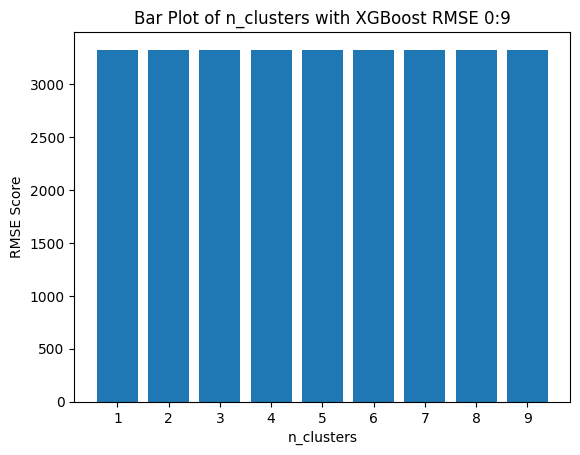

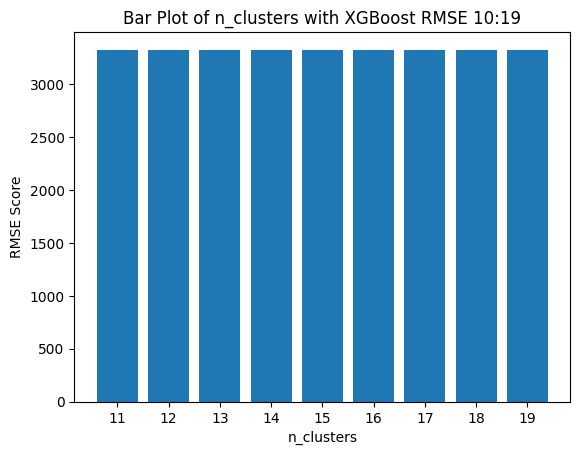

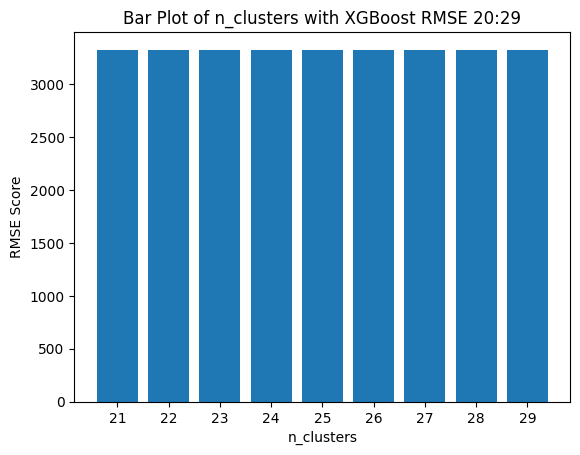

IndexError: list index out of range

In [9]:
for n_step in range(0, 50, 10):
    plt.bar(n_clusters[n_step:n_step+9], all_rmse[n_step+9])
    plt.title(f"Bar Plot of n_clusters with XGBoost RMSE {n_step}:{n_step+9}")
    plt.xlabel("n_clusters")
    plt.ylabel("RMSE Score")
    plt.xticks(ticks=n_clusters[n_step:n_step++9])
    plt.show()
    print()